# Traffic Data Analysis _ 2

In [19]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster
from folium import Choropleth, CircleMarker
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
# Downlaod Dataset from https://gis-txdot.opendata.arcgis.com/search?collection=Dataset

In [4]:
# Load the data
df = pd.read_csv('/Users/moni/Downloads/TxDOT_AADT_Annuals.csv')
df

,X,Y,OBJECTID,ID,DIST_NM,CNTY_NM,T_FLAG,AADT_2022,AADT_2021,AADT_2020,...,AADT_2007,AADT_2006,AADT_2005,AADT_2004,AADT_2003,ZLEVEL,DIST_NBR,CNTY_NBR,MAP_LBL,ON_ROAD
0,-106.143404,31.437593,1,4913.0,El Paso,El Paso,72H206T,154.0,154.0,197.0,...,2200.0,2400.0,2620.0,2700.0,2600.0,13.0,24.0,72.0,154,Tornillo Guadalupe Rd
1,-106.139529,31.443774,2,4921.0,El Paso,El Paso,72H208,657.0,612.0,466.0,...,1250.0,1400.0,1380.0,1650.0,1550.0,12.0,24.0,72.0,657,FM0076
2,-106.136073,31.441858,3,4929.0,El Paso,El Paso,72SP398,2267.0,2267.0,1725.0,...,0.0,0.0,0.0,0.0,0.0,13.0,24.0,72.0,"2,267",COUNTY ROAD 7206
3,-106.134150,31.445800,4,4937.0,El Paso,El Paso,72H224,1916.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,24.0,72.0,"1,916",M. F. Aguilera Rd
4,-106.098185,31.452735,5,4945.0,El Paso,El Paso,72H203,4670.0,4581.0,4886.0,...,4400.0,4200.0,4240.0,4800.0,4700.0,11.0,24.0,72.0,"4,670",SH0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40480,-94.694221,33.681101,40482,329225.0,Atlanta,Bowie,19H173,2771.0,3069.0,2959.0,...,2500.0,2900.0,2650.0,2500.0,2500.0,10.0,19.0,19.0,"2,771",US0259
40481,-94.616538,33.625361,40483,329233.0,Atlanta,Bowie,19H175,115.0,97.0,87.0,...,110.0,170.0,250.0,300.0,270.0,10.0,19.0,19.0,115,FM2735
40482,-94.497009,33.592673,40484,329241.0,Atlanta,Bowie,19H179,167.0,131.0,131.0,...,160.0,150.0,160.0,180.0,200.0,10.0,19.0,19.0,167,FM0992
40483,-94.413337,33.568163,40485,329249.0,Atlanta,Bowie,19H4,2937.0,3166.0,3404.0,...,3400.0,3100.0,3190.0,3600.0,2900.0,11.0,19.0,19.0,"2,937",SH0008


## About the data

Purpose of Data Collection:
The primary purpose of the traffic stations is to collect AADT data.
Toll road traffic counts may be included for context but might not represent on-system traffic.

Frequency of Data Collection:
Traffic counts are collected annually to measure the usage of public roads in the state.

Calculation of AADT:
AADT is calculated using a formula: AADT = axles * axle factor * seasonal factor.
The factors involved in the calculation include the volume count (number of vehicles), axle factor, and seasonal factor.
AADT (Annual Average Daily Traffic):
AADT is a measure of the average number of vehicles that pass a specific point on a road in a day over the course of a year.
Axles:
This refers to the number of axles of vehicles passing through the traffic station. Each vehicle has a certain number of axles (wheels).
Axle Factor:
The axle factor is a multiplier that accounts for the different weights and impacts of vehicles with varying numbers of axles. Different vehicles, such as cars, trucks, and buses, exert different stress on the road surface. The axle factor helps adjust the count based on the type of vehicles passing through.
Seasonal Factor:
The seasonal factor is another multiplier that adjusts the AADT calculation based on seasonal variations in traffic. Traffic patterns may vary during different seasons due to factors like weather conditions, holidays, or events. This factor helps account for these variations.

Data Source:
The data comes from the Statewide Traffic Analysis and Reporting System (STARS II), indicating the system responsible for managing and analyzing the traffic data.


In [5]:
# Dataframe discription
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40485 entries, 0 to 40484
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          40484 non-null  float64
 1   Y          40484 non-null  float64
 2   OBJECTID   40485 non-null  int64  
 3   ID         40484 non-null  float64
 4   DIST_NM    40484 non-null  object 
 5   CNTY_NM    40484 non-null  object 
 6   T_FLAG     40484 non-null  object 
 7   AADT_2022  40484 non-null  float64
 8   AADT_2021  40484 non-null  float64
 9   AADT_2020  40484 non-null  float64
 10  AADT_2019  40484 non-null  float64
 11  AADT_2018  40484 non-null  float64
 12  AADT_2017  40484 non-null  float64
 13  AADT_2016  40484 non-null  float64
 14  AADT_2015  40484 non-null  float64
 15  AADT_2014  40484 non-null  float64
 16  AADT_2013  40484 non-null  float64
 17  AADT_2012  40484 non-null  float64
 18  AADT_2011  40484 non-null  float64
 19  AADT_2010  40484 non-null  float64
 20  AADT_2

## Data Cleaning

In [6]:
# First find out which unique valuese we have in Country, City and State
print('unique Country count: ',df['CNTY_NM'].nunique())
print('unique Region count: ',df['DIST_NM'].nunique())

unique Country count:  256
unique Region count:  25


In [7]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'DIST_NM', 'CNTY_NM', 'T_FLAG', 'AADT_2022',
       'AADT_2021', 'AADT_2020', 'AADT_2019', 'AADT_2018', 'AADT_2017',
       'AADT_2016', 'AADT_2015', 'AADT_2014', 'AADT_2013', 'AADT_2012',
       'AADT_2011', 'AADT_2010', 'AADT_2009', 'AADT_2008', 'AADT_2007',
       'AADT_2006', 'AADT_2005', 'AADT_2004', 'AADT_2003', 'ZLEVEL',
       'DIST_NBR', 'CNTY_NBR', 'MAP_LBL', 'ON_ROAD'],
      dtype='object')

In [8]:
# Delete unneccesary columns
df_texas = df.copy();
df_texas = df_texas.drop(columns=['OBJECTID', 'ID', 'T_FLAG', 'MAP_LBL'])

column_names = df_texas.columns.tolist()
print('total columns: ',len(column_names),'\n')

df_texas.head()

total columns:  28 



,X,Y,DIST_NM,CNTY_NM,AADT_2022,AADT_2021,AADT_2020,AADT_2019,AADT_2018,AADT_2017,...,AADT_2008,AADT_2007,AADT_2006,AADT_2005,AADT_2004,AADT_2003,ZLEVEL,DIST_NBR,CNTY_NBR,ON_ROAD
0,-106.143404,31.437593,El Paso,El Paso,154.0,154.0,197.0,155.0,234.0,1473.0,...,2200.0,2200.0,2400.0,2620.0,2700.0,2600.0,13.0,24.0,72.0,Tornillo Guadalupe Rd
1,-106.139529,31.443774,El Paso,El Paso,657.0,612.0,466.0,653.0,1097.0,399.0,...,1300.0,1250.0,1400.0,1380.0,1650.0,1550.0,12.0,24.0,72.0,FM0076
2,-106.136073,31.441858,El Paso,El Paso,2267.0,2267.0,1725.0,1873.0,1603.0,1450.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,24.0,72.0,COUNTY ROAD 7206
3,-106.134150,31.445800,El Paso,El Paso,1916.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,24.0,72.0,M. F. Aguilera Rd
4,-106.098185,31.452735,El Paso,El Paso,4670.0,4581.0,4886.0,5838.0,5461.0,5137.0,...,4200.0,4400.0,4200.0,4240.0,4800.0,4700.0,11.0,24.0,72.0,SH0020


In [9]:
# check the data types again
print(df_texas.dtypes)

X            float64
Y            float64
DIST_NM       object
CNTY_NM       object
AADT_2022    float64
AADT_2021    float64
AADT_2020    float64
AADT_2019    float64
AADT_2018    float64
AADT_2017    float64
AADT_2016    float64
AADT_2015    float64
AADT_2014    float64
AADT_2013    float64
AADT_2012    float64
AADT_2011    float64
AADT_2010    float64
AADT_2009    float64
AADT_2008    float64
AADT_2007    float64
AADT_2006    float64
AADT_2005    float64
AADT_2004    float64
AADT_2003    float64
ZLEVEL       float64
DIST_NBR     float64
CNTY_NBR     float64
ON_ROAD       object
dtype: object


In [10]:
# DIST_NM & CNTY_NM are strings

In [11]:
# Missing values
# check null values
df_texas_1 = df_texas.copy()
df_texas_1.isnull().sum()

X              1
Y              1
DIST_NM        1
CNTY_NM        1
AADT_2022      1
AADT_2021      1
AADT_2020      1
AADT_2019      1
AADT_2018      1
AADT_2017      1
AADT_2016      1
AADT_2015      1
AADT_2014      1
AADT_2013      1
AADT_2012      1
AADT_2011      1
AADT_2010      1
AADT_2009      1
AADT_2008      1
AADT_2007      1
AADT_2006      1
AADT_2005      1
AADT_2004      1
AADT_2003      1
ZLEVEL         1
DIST_NBR       1
CNTY_NBR       1
ON_ROAD      331
dtype: int64

In [12]:
# Missing values
# check \\N values
count_occurrences = df_texas_1.apply(lambda x: (x == '\\N').sum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(count_occurrences)


X            0
Y            0
DIST_NM      0
CNTY_NM      0
AADT_2022    0
AADT_2021    0
AADT_2020    0
AADT_2019    0
AADT_2018    0
AADT_2017    0
AADT_2016    0
AADT_2015    0
AADT_2014    0
AADT_2013    0
AADT_2012    0
AADT_2011    0
AADT_2010    0
AADT_2009    0
AADT_2008    0
AADT_2007    0
AADT_2006    0
AADT_2005    0
AADT_2004    0
AADT_2003    0
ZLEVEL       0
DIST_NBR     0
CNTY_NBR     0
ON_ROAD      0
dtype: int64


In [13]:
# Fill the missing values in on_road column with ffill method
# Sort the DataFrame based on 'X' and 'Y' to ensure forward fill works correctly
df_texas_1.sort_values(['X', 'Y'], inplace=True)
# Use forward fill to fill missing 'ON_ROAD' values based on existing values
df_texas_1['ON_ROAD'] = df_texas_1['ON_ROAD'].ffill()
# Display the DataFrame after filling missing values
print(df_texas_1)

                X          Y   DIST_NM  CNTY_NM  AADT_2022  AADT_2021  \
47    -106.682116  31.785592   El Paso  El Paso      846.0        0.0   
48    -106.681506  31.786943   El Paso  El Paso     3238.0        0.0   
65    -106.625971  31.863641   El Paso  El Paso     3004.0     2905.0   
66    -106.625903  31.877940   El Paso  El Paso     3923.0     4154.0   
67    -106.625826  31.882776   El Paso  El Paso     4136.0     4133.0   
...           ...        ...       ...      ...        ...        ...   
37226  -93.576026  31.161103  Beaumont   Newton      918.0      622.0   
37227  -93.567031  31.171233  Beaumont   Newton      104.0      134.0   
37228  -93.566123  31.178793  Beaumont   Newton      967.0      748.0   
37225  -93.524696  31.064099  Beaumont   Newton     1369.0     1301.0   
40484         NaN        NaN       NaN      NaN        NaN        NaN   

       AADT_2020  AADT_2019  AADT_2018  AADT_2017  ...  AADT_2008  AADT_2007  \
47           0.0        0.0        0.0     

In [14]:
df_texas_1.isnull().sum()

X            1
Y            1
DIST_NM      1
CNTY_NM      1
AADT_2022    1
AADT_2021    1
AADT_2020    1
AADT_2019    1
AADT_2018    1
AADT_2017    1
AADT_2016    1
AADT_2015    1
AADT_2014    1
AADT_2013    1
AADT_2012    1
AADT_2011    1
AADT_2010    1
AADT_2009    1
AADT_2008    1
AADT_2007    1
AADT_2006    1
AADT_2005    1
AADT_2004    1
AADT_2003    1
ZLEVEL       1
DIST_NBR     1
CNTY_NBR     1
ON_ROAD      2
dtype: int64

In [15]:
# Drop the missing values
# Drop rows with NaN values
df_cleaned = df_texas_1.dropna()

In [16]:
df_cleaned.isnull().sum()

X            0
Y            0
DIST_NM      0
CNTY_NM      0
AADT_2022    0
AADT_2021    0
AADT_2020    0
AADT_2019    0
AADT_2018    0
AADT_2017    0
AADT_2016    0
AADT_2015    0
AADT_2014    0
AADT_2013    0
AADT_2012    0
AADT_2011    0
AADT_2010    0
AADT_2009    0
AADT_2008    0
AADT_2007    0
AADT_2006    0
AADT_2005    0
AADT_2004    0
AADT_2003    0
ZLEVEL       0
DIST_NBR     0
CNTY_NBR     0
ON_ROAD      0
dtype: int64

## Analayzing

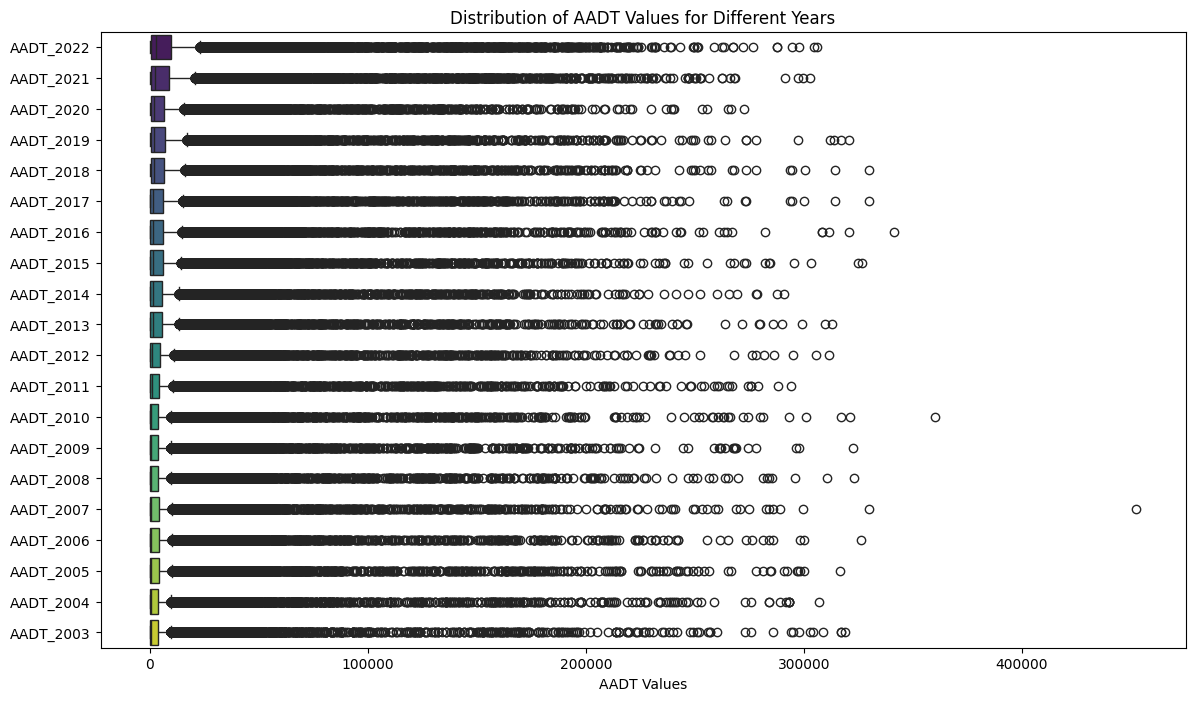

In [17]:
# Selecting the relevant columns for AADT values for different years
aadt_columns = ['AADT_2022', 'AADT_2021', 'AADT_2020', 'AADT_2019', 'AADT_2018', 'AADT_2017',
                'AADT_2016', 'AADT_2015', 'AADT_2014', 'AADT_2013', 'AADT_2012', 'AADT_2011',
                'AADT_2010', 'AADT_2009', 'AADT_2008', 'AADT_2007', 'AADT_2006', 'AADT_2005',
                'AADT_2004', 'AADT_2003']

# Subset the DataFrame to include only AADT columns
aadt_df = df_cleaned[aadt_columns]

# Create a boxplot for each year
plt.figure(figsize=(14, 8))
sns.boxplot(data=aadt_df, orient='h', palette='viridis')
plt.title('Distribution of AADT Values for Different Years')
plt.xlabel('AADT Values')
plt.show()

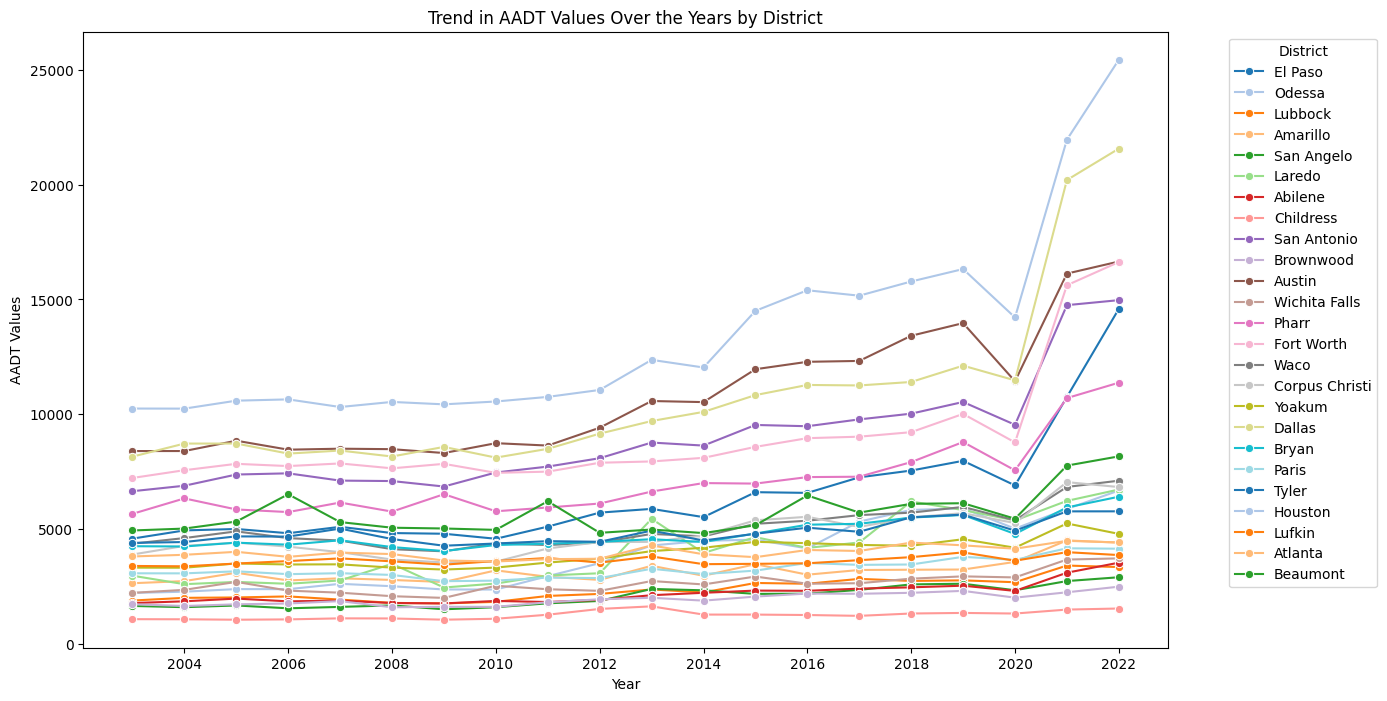

In [18]:
# Finding trend based on AASTs
# Selecting relevant columns
columns_of_interest = ['DIST_NM', 'AADT_2022', 'AADT_2021', 'AADT_2020', 'AADT_2019', 'AADT_2018', 'AADT_2017',
                        'AADT_2016', 'AADT_2015', 'AADT_2014', 'AADT_2013', 'AADT_2012', 'AADT_2011',
                        'AADT_2010', 'AADT_2009', 'AADT_2008', 'AADT_2007', 'AADT_2006', 'AADT_2005',
                        'AADT_2004', 'AADT_2003']

# Subset the DataFrame to include only relevant columns
df_trend = df_cleaned[columns_of_interest]

# Melt the DataFrame to long format for easy plotting
df_trend_long = df_trend.melt(id_vars=['DIST_NM'], var_name='Year', value_name='AADT')

# Convert 'Year' column to numeric for correct sorting
df_trend_long['Year'] = df_trend_long['Year'].str.extract('(\\d+)').astype(float)

# Create a custom color palette with more distinguishable colors
custom_palette = sns.color_palette("tab20", n_colors=len(df_trend['DIST_NM'].unique()))

# Set the custom color palette
sns.set_palette(custom_palette)

# Create line plot for each district
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_trend_long, x='Year', y='AADT', hue='DIST_NM', marker='o', ci=None)


# Adjust x-axis ticks to show every 2 years
plt.xticks(df_trend_long['Year'].unique()[::2])

# Move the legend to the upper-left corner
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('Trend in AADT Values Over the Years by District')
plt.xlabel('Year')
plt.ylabel('AADT Values')
plt.show()

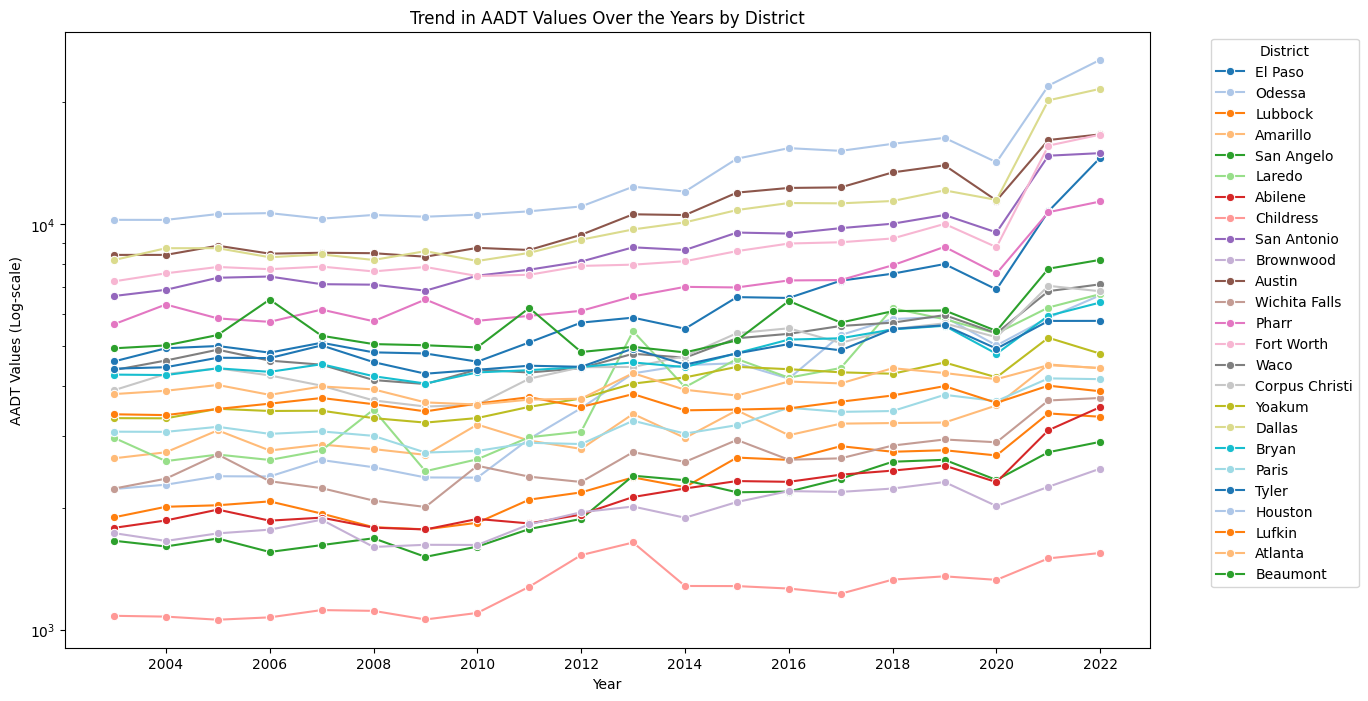

In [20]:
# AADT values in log-scale for enhanced clarity

# Create line plot for each district with log-scale y-axis
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_trend_long, x='Year', y='AADT', hue='DIST_NM', marker='o', ci=None)

# Set y-axis to log-scale
plt.yscale('log')

# Adjust x-axis ticks to show every 2 years
plt.xticks(df_trend_long['Year'].unique()[::2])

# Move the legend to the upper-left corner
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Trend in AADT Values Over the Years by District')
plt.xlabel('Year')
plt.ylabel('AADT Values (Log-scale)')  # Update y-axis label
plt.show()


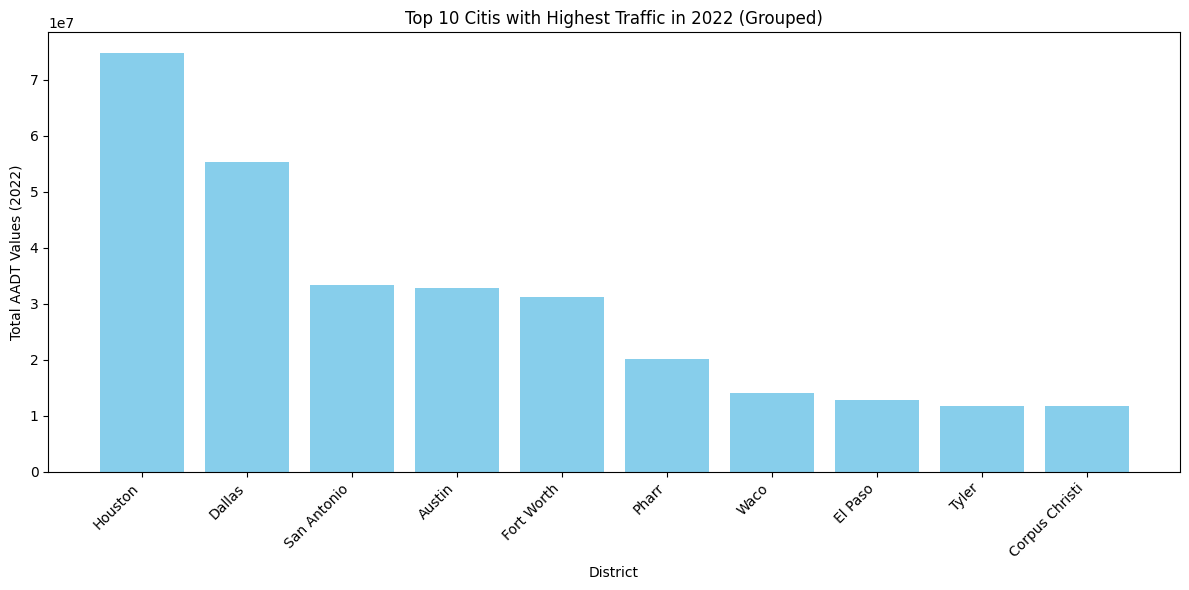

In [22]:
# Top 10 Districts with the most traffic in 2022
# Select relevant columns
columns_of_interest = ['DIST_NM', 'AADT_2022']

# Subset the DataFrame to include only relevant columns
df_traffic_2022 = df_cleaned[columns_of_interest]

# Group by 'DIST_NM' and sum the 'AADT_2022' values
df_grouped = df_traffic_2022.groupby('DIST_NM')['AADT_2022'].sum().reset_index()

# Sort the grouped DataFrame by the sum of 'AADT_2022' in descending order
df_grouped_sorted = df_grouped.sort_values(by='AADT_2022', ascending=False)

# Select the top 10 districts
top_10_districts_2022 = df_grouped_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_districts_2022['DIST_NM'], top_10_districts_2022['AADT_2022'], color='skyblue')
plt.xlabel('District')
plt.ylabel('Total AADT Values (2022)')
plt.title('Top 10 Citis with Highest Traffic in 2022 (Grouped)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


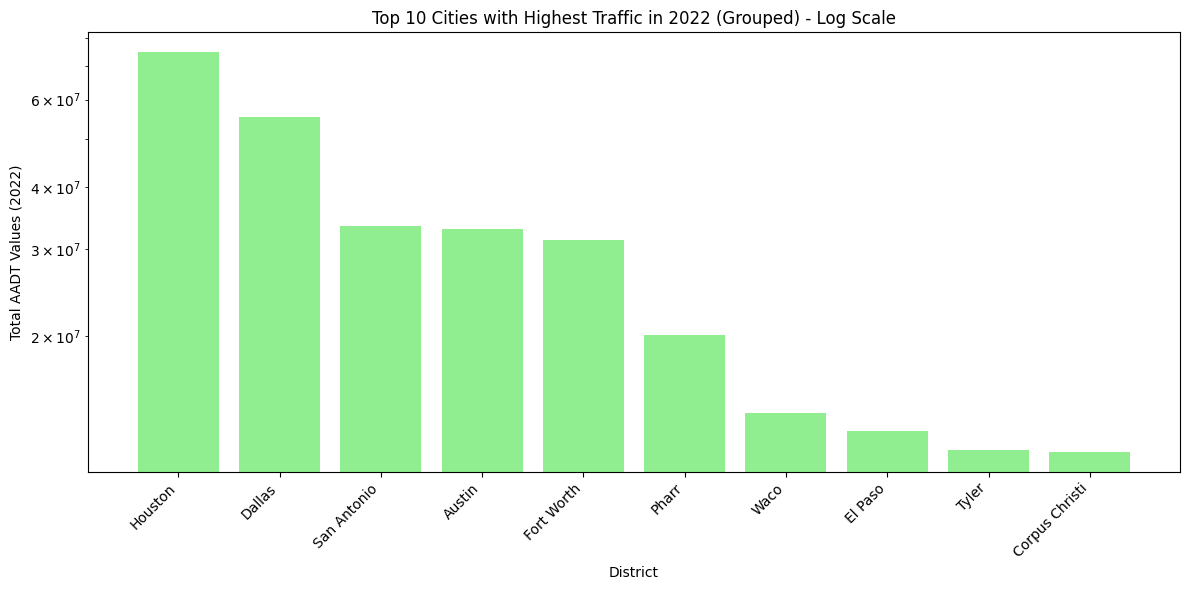

In [24]:
# Top 10 Districts with the most traffic in 2022 - AADT log-based
# Create a bar plot with log-scale y-axis
plt.figure(figsize=(12, 6))
plt.bar(top_10_districts_2022['DIST_NM'], top_10_districts_2022['AADT_2022'], color='LightGreen')
plt.xlabel('District')
plt.ylabel('Total AADT Values (2022)')
plt.title('Top 10 Cities with Highest Traffic in 2022 (Grouped) - Log Scale')

# Set y-axis to log-scale
plt.yscale('log')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

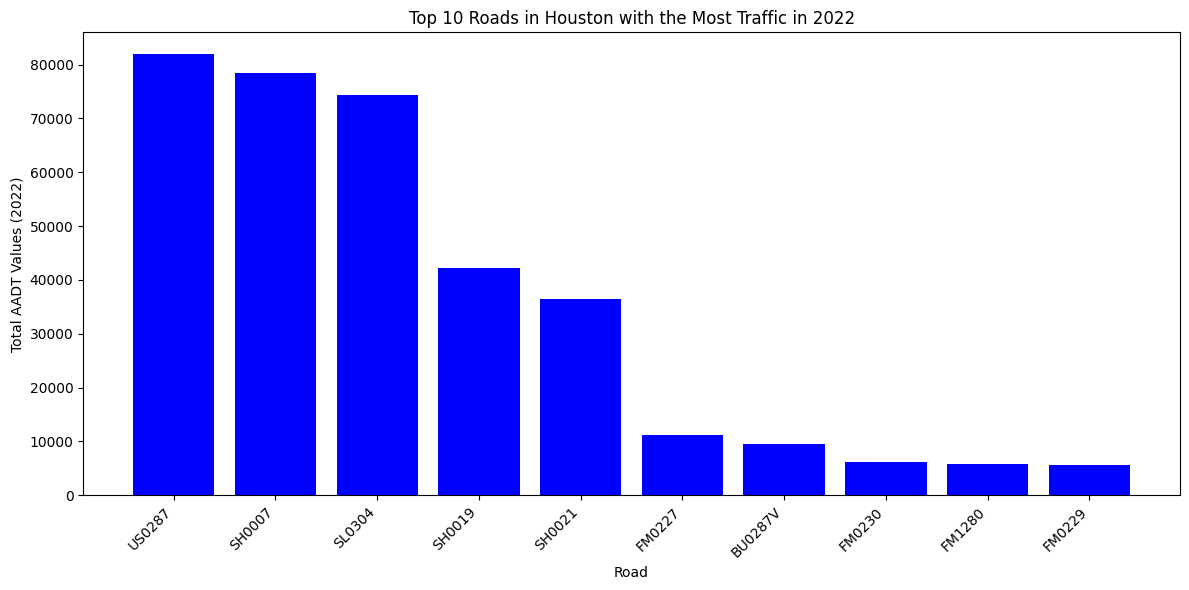

In [25]:
# TOP 10 Roads with most traffic amount in 2022
# Filter data for Houston
df_houston = df_cleaned[df_cleaned['CNTY_NM'] == 'Houston']

# Select relevant columns
columns_of_interest = ['ON_ROAD', 'AADT_2022']

# Subset the DataFrame to include only relevant columns
df_traffic_houston_2022 = df_houston[columns_of_interest]

# Group by 'ON_ROAD' and sum the 'AADT_2022' values
df_traffic_houston_2022_grouped = df_houston.groupby('ON_ROAD')['AADT_2022'].sum().reset_index()

# Sort the grouped DataFrame by the sum of 'AADT_2022' in descending order
df_traffic_houston_2022_sorted = df_traffic_houston_2022_grouped.sort_values(by='AADT_2022', ascending=False)

# Select the top 10 roads
top_10_roads_houston_2022 = df_traffic_houston_2022_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_roads_houston_2022['ON_ROAD'], top_10_roads_houston_2022['AADT_2022'], color='blue')
plt.xlabel('Road')
plt.ylabel('Total AADT Values (2022)')
plt.title('Top 10 Roads in Houston with the Most Traffic in 2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

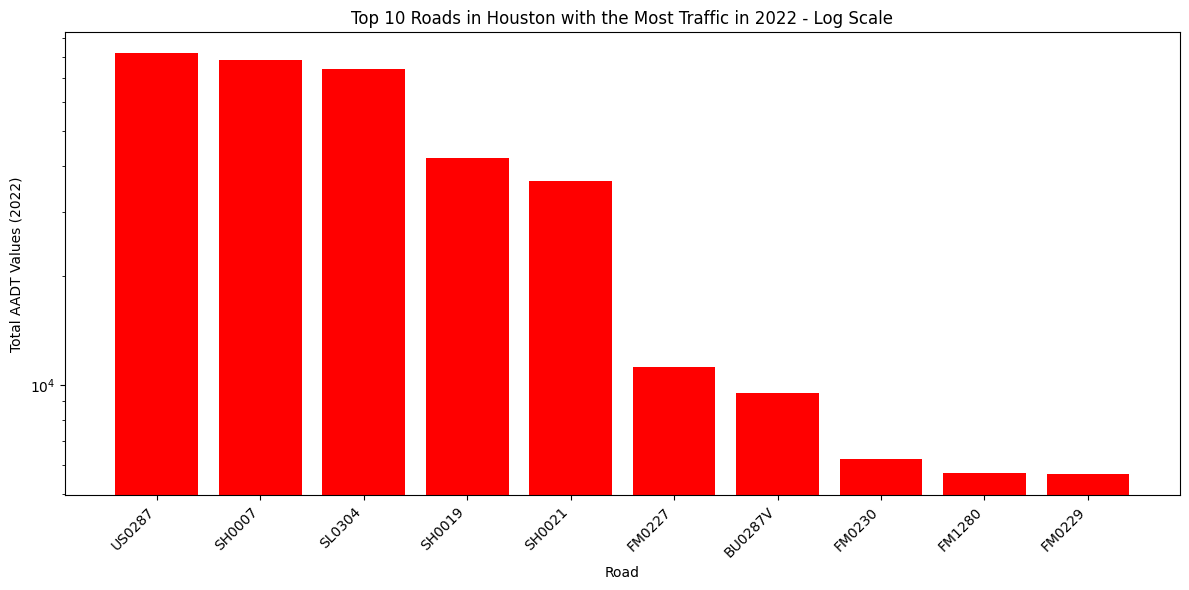

In [26]:
# TOP 10 Roads with most traffic amount in 2022 - log-based

# Create a bar plot with log-scale y-axis
plt.figure(figsize=(12, 6))
plt.bar(top_10_roads_houston_2022['ON_ROAD'], top_10_roads_houston_2022['AADT_2022'], color='red')
plt.xlabel('Road')
plt.ylabel('Total AADT Values (2022)')
plt.title('Top 10 Roads in Houston with the Most Traffic in 2022 - Log Scale')

# Set y-axis to log-scale
plt.yscale('log')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
# Predicting the Traffic for Houston for the year 2023

# Filter data for Houston
df_houston = df_cleaned[df_cleaned['CNTY_NM'] == 'Houston']  # Assuming 'CNTY_NM' contains county names

# Selecting relevant columns
traffic_columns = ['AADT_2003', 'AADT_2004', 'AADT_2005', 'AADT_2006', 'AADT_2007',
                   'AADT_2008', 'AADT_2009', 'AADT_2010', 'AADT_2011', 'AADT_2012',
                   'AADT_2013', 'AADT_2014', 'AADT_2015', 'AADT_2016', 'AADT_2017',
                   'AADT_2018', 'AADT_2019', 'AADT_2020', 'AADT_2021', 'AADT_2022']

df_houston = df_houston[['X', 'Y'] + traffic_columns]

# Drop missing values
df_houston = df_houston.dropna()

# Prepare features and target
X = df_houston.drop(['X', 'Y'], axis=1)  # Use traffic amounts from 2003 to 2022 as features
y = df_houston['AADT_2022']  # Predicting traffic amount for 2022

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with an imputer and linear regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('regressor', LinearRegression())
])

# Train the linear regression model using the pipeline
pipeline.fit(X_train, y_train)

# Predict traffic amounts for 2023
future_years = [2023]
future_data = pd.DataFrame(index=future_years)

# Add time features (years) for the future years
X_future = pd.DataFrame(index=future_data.index, columns=X_train.columns)

# Predict traffic amounts for 2023 and 202
future_data['Predicted_Traffic'] = pipeline.predict(X_future)

# Display predictions for 2023
print(future_data)


      Predicted_Traffic
2023        1794.289655


In [22]:
# Interactive map

# Sample a subset of data for faster plotting 
# df_sample = df_cleaned.sample(n=5000, random_state=42)
df_sample = df_cleaned.copy()
# Create a base map
map_traffic = folium.Map(location=[29.7604, -95.3698], zoom_start=10)  # Houston's approximate center

# Create a MarkerCluster to add markers efficiently
marker_cluster = MarkerCluster().add_to(map_traffic)

# Add CircleMarkers for each data point in the sample
for index, row in df_sample.iterrows():
    popup_content = f"Road: {row['DIST_NM']}<br>Traffic: {row['AADT_2022']}<br>Location: ({row['X']}, {row['Y']})"
    
    # Determine color based on traffic amount (you can customize the color scale)
    color = 'red' if row['AADT_2022'] > 1000 else 'green'
    
    CircleMarker(
        location=[row['Y'], row['X']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=popup_content
    ).add_to(marker_cluster)

# Save the map
map_traffic.save('houstonTexas_traffic_map_choropleth.html')


In [23]:
!open houstonTexas_traffic_map_choropleth.html

## Conclusion:

The analysis of Annual Average Daily Traffic (AADT) data reveals interesting trends in traffic volumes over the years in Texas city. Here are the key findings: 🚗📈

1. **Fluctuating Traffic**:
   - The AADT values have **fluctuated** significantly from year to year.
   - Some years witnessed higher traffic, while others experienced lower volumes.

2. **High Traffic Years**:
   - The following years stood out with **elevated AADT values**:
     - **2021**: Notably high traffic volume.
     - **2020**: Another year marked by substantial traffic.
     - **2019**: Also noteworthy for its traffic levels.

3. **Moderate Traffic Years**:
   - **2018**, **2017**, and **2016** fall within the **moderate range**.
   - These years maintained a consistent traffic flow.

4. **Low Traffic Years**:
   - **2015**, **2014**, and **2013** recorded **lower AADT values**.
   - Traffic during these years was comparatively lighter.

In addition, it is evident that **Houston**, **Dallas**, and **San Antonio** were the cities with the highest traffic in **2022**. These urban centers continue to play a significant role in shaping our region's transportation landscape.
